We now know how to use joins to combine data from two tables within a database. In reality, most databases have more than 2 tables, so we'll need strategies to be able to write queries to combine data from 3 or more tables.

We'll learn some new techniques to work with the sort of databases that most businesses will use. We'll be working with a modified version of a database called [Chinook](https://github.com/lerocha/chinook-database). The Chinook database contains information about a fictional digital music shop - kind of like a mini-iTunes store.

The Chinook database contains information about the **artists**, **songs**, and **albums** from the music shop, as well as information on the shop's **employees**, **customers**, and the **customers purchases**. This information is contained in **eleven** tables.

Looking at all those tables can be overwhelming at first, but generally speaking we will only need to think about the specific tables that have the data we require and their connections.

In [1]:
import numpy as np
import pandas as pd
import sqlite3 as sql

In [2]:
conn = sql.connect("chinook.db")

def read_query(q):
    return pd.read_sql_query(q, conn)

In [3]:
q = '''Select * From sqlite_master where type = "table"'''
read_query(q)

,type,name,tbl_name,rootpage,sql
0,table,album,album,2,CREATE TABLE [album]\n(\n [album_id] INTEGE...
1,table,artist,artist,3,CREATE TABLE [artist]\n(\n [artist_id] INTE...
2,table,customer,customer,4,CREATE TABLE [customer]\n(\n [customer_id] ...
3,table,employee,employee,5,CREATE TABLE [employee]\n(\n [employee_id] ...
4,table,genre,genre,6,CREATE TABLE [genre]\n(\n [genre_id] INTEGE...
5,table,invoice,invoice,7,CREATE TABLE [invoice]\n(\n [invoice_id] IN...
6,table,invoice_line,invoice_line,8,CREATE TABLE [invoice_line]\n(\n [invoice_l...
7,table,media_type,media_type,9,CREATE TABLE [media_type]\n(\n [media_type_...
8,table,playlist,playlist,10,CREATE TABLE [playlist]\n(\n [playlist_id] ...
9,table,playlist_track,playlist_track,11,CREATE TABLE [playlist_track]\n(\n [playlis...


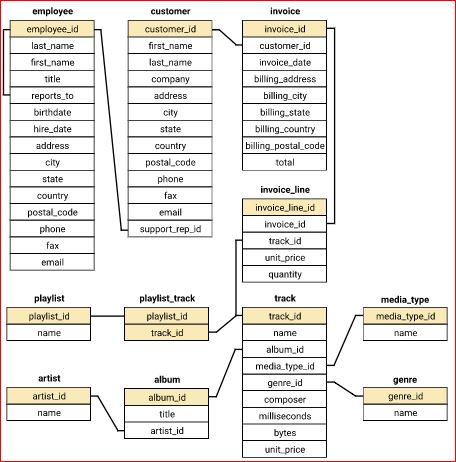

In [1]:
from IPython.display import Image
Image("Chinook.JPG")

Our first task is to gather some information on a specific purchase. For one single purchase (`invoice_id`) we want to know, for each `track` purchased:

1. The id of the track.
2. The name of the track.
3. The name of media type of the track.
4. The price that the customer paid for the track.
5. The quantity of the track that was purchased.

To gather this information, we will need to write a query that joins 3 tables: `invoice_line`, `track`, and `media_type`.

In [4]:
read_query('''Select * from invoice_line limit 5''')

,invoice_line_id,invoice_id,track_id,unit_price,quantity
0,1,1,1158,0.99,1
1,2,1,1159,0.99,1
2,3,1,1160,0.99,1
3,4,1,1161,0.99,1
4,5,1,1162,0.99,1


In [5]:
read_query('''Select * from track limit 5''')

,track_id,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


In [6]:
read_query('''Select * from media_type limit 5''')

,media_type_id,name
0,1,MPEG audio file
1,2,Protected AAC audio file
2,3,Protected MPEG-4 video file
3,4,Purchased AAC audio file
4,5,AAC audio file


Joining multiple tables is as simple as adding an extra **JOIN** clause. The SQL engine interprets joins in order, so the first join will be executed, and then the second join will be executed against the result of the first join

In [7]:
# query that gathers data about the invoice with an invoice_id of 4. Include the following columns in order:
# The id of the track, track_id.
# The name of the track, track_name.
# The name of media type of the track, track_type.
# The price that the customer paid for the track, unit_price.
# The quantity of the track that was purchased, quantity.

q = '''Select t.track_id track_id, t.name track_name, m.name track_type, 
       il.unit_price  unit_price, il.quantity
       From invoice_line il 
       left Join track t
       on il.track_id = t.track_id
       Inner Join media_type m
       ON m.media_type_id = t.media_type_id
       Where il.invoice_id  = 4'''
read_query(q)

,track_id,track_name,track_type,unit_price,quantity
0,3448,"Lamentations of Jeremiah, First Set \ Incipit ...",Protected AAC audio file,0.99,1
1,2560,Violent Pornography,MPEG audio file,0.99,1
2,3336,War Pigs,Purchased AAC audio file,0.99,1
3,829,Let's Get Rocked,MPEG audio file,0.99,1
4,1872,Attitude,MPEG audio file,0.99,1
5,748,Dealer,MPEG audio file,0.99,1
6,1778,You're What's Happening (In The World Today),MPEG audio file,0.99,1
7,2514,Spoonman,MPEG audio file,0.99,1


Let's extend the query we wrote by adding the artist for each track.

In [8]:
# Add a column containing the artists name to the query from the previous screen.
# The column should be called artist_name
# The column should be placed between track_name and track_type

q = '''Select t.track_id track_id, t.name track_name,ar.name, m.name track_type,
        il.unit_price  unit_price, il.quantity
       From invoice_line il 
       left Join track t
       on il.track_id = t.track_id
       Inner Join media_type m
       ON m.media_type_id = t.media_type_id
       Inner join album alb 
       On alb.album_id = t.album_id
       inner join artist ar
       ON ar.artist_id = alb.artist_id
       Where il.invoice_id  = 4'''
read_query(q)

,track_id,track_name,name,track_type,unit_price,quantity
0,3448,"Lamentations of Jeremiah, First Set \ Incipit ...",The King's Singers,Protected AAC audio file,0.99,1
1,2560,Violent Pornography,System Of A Down,MPEG audio file,0.99,1
2,3336,War Pigs,Cake,Purchased AAC audio file,0.99,1
3,829,Let's Get Rocked,Def Leppard,MPEG audio file,0.99,1
4,1872,Attitude,Metallica,MPEG audio file,0.99,1
5,748,Dealer,Deep Purple,MPEG audio file,0.99,1
6,1778,You're What's Happening (In The World Today),Marvin Gaye,MPEG audio file,0.99,1
7,2514,Spoonman,Soundgarden,MPEG audio file,0.99,1


In [9]:
# query that returns the top 5 albums, as calculated by the number of times a track from that album has been purchased. 
# query should be sorted from most tracks purchased to least tracks purchased and return the following columns, in order:
# album, the title of the album
# artist, the artist who produced the album
# tracks_purchased the total number of tracks purchased from that album

q = """Select alb.title album, ar.name artist, 
       Count(il.track_id) tracks_purchased 
       from invoice_line il
       left join track t
       on t.track_id = il.track_id
       inner join album alb
       on alb.album_id = t.album_id
       inner join artist ar
       on ar.artist_id = alb.artist_id
       Group By 1
       Order by 3 Desc
       Limit 5"""
read_query(q)

,album,artist,tracks_purchased
0,Are You Experienced?,Jimi Hendrix,187
1,Faceless,Godsmack,96
2,Mezmerize,System Of A Down,93
3,Get Born,JET,90
4,The Doors,The Doors,83


In [ ]:
# Alternative Query

q = """SELECT
    ta.album_title album,
    ta.artist_name artist,
    COUNT(*) tracks_purchased
FROM invoice_line il
INNER JOIN (
            SELECT
                t.track_id,
                al.title album_title,
                ar.name artist_name
            FROM track t
            INNER JOIN album al ON al.album_id = t.album_id
            INNER JOIN artist ar ON ar.artist_id = al.artist_id
           ) ta
           ON ta.track_id = il.track_id
GROUP BY 1, 2
ORDER BY 3 DESC LIMIT 5;"""

read_query(q)

In some cases, there can be a relation between two columns within the same table. We can see that in our `employee table`, where there is a `reports_to column` that has a relation to the `employee_id` column within the same table.

The `reports_to column` identifies each **employee's supervisor**. If we wanted to create a report of each employee and their supervisor's name, we would need some way of joining a table to itself. Doing this is called a **recursive join**.

Technically, a recursive join will use one of the other standard joins— usually an **INNER JOIN** or **LEFT JOIN** since these are the most commonly used joins— and aliases to distinguish between the table on each side of the join. Here's a simple example of a recursive join in action:

`SELECT
    e1.employee_id,
    e2.employee_id supervisor_id
FROM employee e1
INNER JOIN employee e2 on e1.reports_to = e2.employee_id
LIMIT 4;`

One thing that would be nice is being able to combine the `first_name` and `last_name` columns into a single column. We can do that using the **concatenate operator:** `||`

In [10]:
# Query that returns information about each employee and their supervisor.
# The report should include employees even if they do not report to another employee.
# The report should be sorted alphabetically by the employee_name column.
# Your query should return the following columns, in order:
# employee_name - containing the first_name and last_name columns separated by a space, eg Luke Skywalker
# employee_title - the title of that employee
# supervisor_name - the first and last name of the person the employee reports to, in the same format as employee_name
# supervisor_title - the title of the person the employee reports to

q = """Select e1.first_name || " " || e1.last_name employee_name, 
        e1.title employee_title ,
        e2.first_name || " " || e2.last_name supervisor_name, 
        e2.title supervisor_title
        from employee e1
        left join employee e2 
        On e1.reports_to = e2.employee_id
        Order by 1"""
read_query(q)

,employee_name,employee_title,supervisor_name,supervisor_title
0,Andrew Adams,General Manager,None,None
1,Jane Peacock,Sales Support Agent,Nancy Edwards,Sales Manager
2,Laura Callahan,IT Staff,Michael Mitchell,IT Manager
3,Margaret Park,Sales Support Agent,Nancy Edwards,Sales Manager
4,Michael Mitchell,IT Manager,Andrew Adams,General Manager
5,Nancy Edwards,Sales Manager,Andrew Adams,General Manager
6,Robert King,IT Staff,Michael Mitchell,IT Manager
7,Steve Johnson,Sales Support Agent,Nancy Edwards,Sales Manager


We noticed that the SQL engine will concatenate multiple columns, columns with a string, and that the SQL engine handles converting different types where needed.

Let's say we're working as a sales support agent for **Chinook**, and we get back from lunch and see that one of our colleagues has left a phone message on our desk: **"Call Jen"**. Writing a query to get this information out of the database might seem simple at first:

`SELECT
    first_name,
    last_name,
    phone
FROM customer
WHERE first_name = "Jen"`


`first_name	last_name	phone`

No rows were returned by our query! Suddenly we realize— the name in the database might not be exactly **"Jen"**, it might be **Jenny**, **Jennifer**, **Jenna**, or something else. Rather than having to keep trying different combinations, we can use the `LIKE` operator to find pattern matches. The syntax for `LIKE` is as follows:

`WHERE [column_name] LIKE "[pattern]"`

Our pattern should be the substring we want to match for, and one or more % characters:

* `%Jen` - will match Jen at the end of a string, eg **Sarah-Jen**
* `Jen%` - will match Jen at the start of a string, eg **Jenny**
* `%Jen%` - will match Jen anywhere within the string, eg **Kris Jenner**

Keep in mind that in SQLite LIKE is case in-sensitive, so `LIKE %jen%` will match **Jen** and **JEN** and **JeN**. Other flavors of SQL may be case sensitive, so we may need to use the `LOWER()` function to get a case insensitive match.

In [14]:
# You have just returned from lunch to see another phone message on your desk: "Call Belle."

# Write a query that finds the contact details of a customer with a first_name containing Belle from the database. Your query should include the following columns, in order:
# first_name
# last_name
# phone

q = """Select first_name, last_name, phone from customer
Where first_name Like '%Belle%'"""

read_query(q)

,first_name,last_name,phone
0,Isabelle,Mercier,+33 03 80 73 66 99


### case statement. 

The case statement acts like a series of **if/then** options for a new column. The syntax for CASE is:

`CASE
    WHEN [comparison_1] THEN [value_1]
    WHEN [comparison_2] THEN [value_2]
    ELSE [value_3]
    END
    AS [new_column_name]`

There can be 1 or more `WHEN` lines, and the `ELSE` line is optional— without it, rows that don't match any `WHEN` will be assigned a **null** value.

In [37]:
# query that summarizes the purchases of each customer
# query should include the following columns, in order:
# customer_name - containing the first_name and last_name columns separated by a space, eg Luke Skywalker.
# number_of_purchases, counting the number of purchases made by each customer.
# total_spent - the total sum of money spent by each customer.
# customer_category - a column that categorizes the customer based on their total purchases. The column should contain the following values:
# small spender - If the customer's total purchases are less than $40.
# big spender - If the customer's total purchases are greater than $100.
# regular - If the customer's total purchases are between $40 and $100 (inclusive).
# Order results by the customer_name column.

q = '''Select c.first_name || " " || c.last_name customer_name, 
        count(inv.customer_id) number_of_purchases,
        SUM(inv.total) total_spent,
        Case 
            When SUM(inv.total) < 40 Then "small spender"
            When Sum(inv.total) > 100 Then "big spender"
            Else "regular"
            END
            AS customer_category
        from customer c 
        Inner Join invoice inv
        On inv.customer_id = c.customer_id
        Group by inv.customer_id
        Order by 1'''
read_query(q)

,customer_name,number_of_purchases,total_spent,customer_category
0,Aaron Mitchell,8,70.29,regular
1,Alexandre Rocha,10,69.30,regular
2,Astrid Gruber,9,69.30,regular
3,Bjørn Hansen,9,72.27,regular
4,Camille Bernard,9,79.20,regular
5,Daan Peeters,7,60.39,regular
6,Dan Miller,12,95.04,regular
7,Diego Gutiérrez,5,39.60,small spender
8,Dominique Lefebvre,9,72.27,regular
9,Eduardo Martins,12,60.39,regular


We noticed that, we can't use aliases in the `WHEN` line, so when writing a `CASE` statement that deals with **aggregate** functions, we will need to include the **aggregate** function in each `WHEN` line.